In [1]:
#Q1 Loadind and preprocessing data

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Check for missing values
# Convert to a pandas DataFrame to check for missing values easily
df = pd.DataFrame(X, columns=data.feature_names)
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64


In [3]:
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)
print(f"Scaled data shape: {X_scaled.shape}")
print(f"Target shape: {y.shape}")

Scaled data shape: (569, 30)
Target shape: (569,)


In [5]:
X_scaled#scaled the data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [6]:
mean_after_scaling = np.mean(X_scaled, axis=0)  # Mean across each feature (columns)
std_after_scaling = np.std(X_scaled, axis=0)  # Standard deviation across each feature (columns)


print("Mean after scaling (should be close to 0 for each feature):")
print(mean_after_scaling)
#ideally  after scaling we prefer zero mean and we have almost in that range.

Mean after scaling (should be close to 0 for each feature):
[-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15 -1.12036918e-15 -4.42138027e-16  9.73249991e-16
 -1.97167024e-15 -1.45363120e-15 -9.07641468e-16 -8.85349205e-16
  1.77367396e-15 -8.29155139e-16 -7.54180940e-16 -3.92187747e-16
  7.91789988e-16 -2.73946068e-16 -3.10823423e-16 -3.36676596e-16
 -2.33322442e-15  1.76367415e-15 -1.19802625e-15  5.04966114e-16
 -5.21317026e-15 -2.17478837e-15  6.85645643e-16 -1.41265636e-16
 -2.28956670e-15  2.57517109e-15]


In [7]:
print("\nStandard deviation after scaling (should be close to 1 for each feature):")
print(std_after_scaling)

#we prfer to get a statndard deviaton=1 after feature scaling


Standard deviation after scaling (should be close to 1 for each feature):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


If one feature has values between 0 and 1, and another has values between 1,000 and 10,000, the second feature will dominate the analysis unless both are scaled to have the same range (or standard deviation). Standardization to a mean of 0 and standard deviation of 1 ensures that both features contribute equally to the analysis, regardless of their original scale.


In [27]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split





# Preprocess the data (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

# Map numeric predictions to class names
class_names = ["malignant", "benign"]
predicted_classes = [class_names[label] for label in y_pred]
true_classes = [class_names[label] for label in y_test]

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display sample predictions
print("\nSample Predictions:")
for i in range(10):
    print(f"Sample {i + 1}: True Label = {true_classes[i]}, Predicted = {predicted_classes[i]}")


Accuracy: 0.9737

Sample Predictions:
Sample 1: True Label = benign, Predicted = benign
Sample 2: True Label = malignant, Predicted = malignant
Sample 3: True Label = malignant, Predicted = malignant
Sample 4: True Label = benign, Predicted = benign
Sample 5: True Label = benign, Predicted = benign
Sample 6: True Label = malignant, Predicted = malignant
Sample 7: True Label = malignant, Predicted = malignant
Sample 8: True Label = malignant, Predicted = malignant
Sample 9: True Label = benign, Predicted = benign
Sample 10: True Label = benign, Predicted = benign


Accuracy: 0.96

Sample Predictions:
Sample 1: True Label = benign, Predicted = benign
Sample 2: True Label = malignant, Predicted = malignant
Sample 3: True Label = malignant, Predicted = malignant
Sample 4: True Label = benign, Predicted = benign
Sample 5: True Label = benign, Predicted = benign
Sample 6: True Label = malignant, Predicted = malignant
Sample 7: True Label = malignant, Predicted = malignant
Sample 8: True Label = malignant, Predicted = malignant
Sample 9: True Label = benign, Predicted = benign
Sample 10: True Label = benign, Predicted = benign


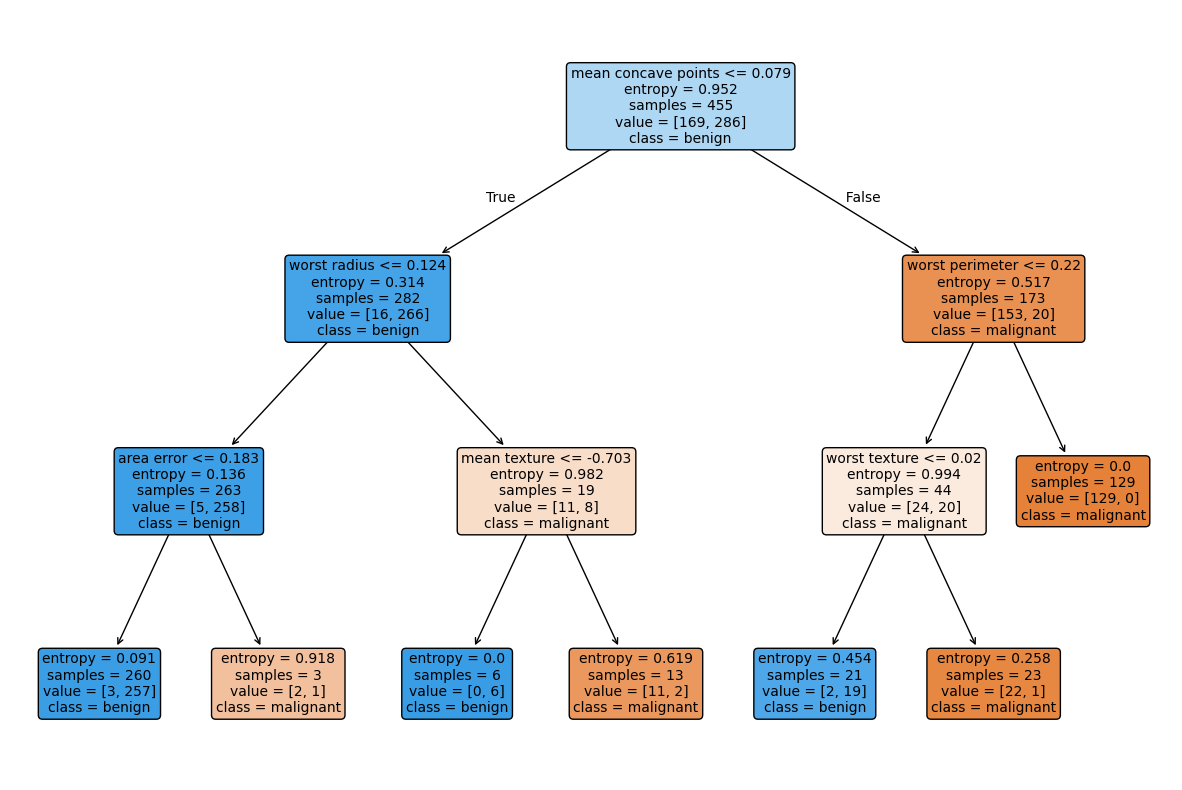

In [25]:

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


class_names = ["malignant", "benign"]
predicted_classes = [class_names[label] for label in y_pred]
true_classes = [class_names[label] for label in y_test]


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


print("\nSample Predictions:")
for i in range(10):
    print(f"Sample {i + 1}: True Label = {true_classes[i]}, Predicted = {predicted_classes[i]}")


plt.figure(figsize=(15, 10))
plot_tree(
    clf,
    feature_names=data.feature_names,
    class_names=data.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


In [24]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier



rf_clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

rf_clf.fit(X_train, y_train)


y_pred = rf_clf.predict(X_test)


class_names = ["malignant", "benign"]
predicted_classes = [class_names[label] for label in y_pred]
true_classes = [class_names[label] for label in y_test]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display sample predictions
print("\nSample Predictions:")
for i in range(10):
    print(f"Sample {i + 1}: True Label = {true_classes[i]}, Predicted = {predicted_classes[i]}")


Accuracy: 0.96

Sample Predictions:
Sample 1: True Label = benign, Predicted = benign
Sample 2: True Label = malignant, Predicted = malignant
Sample 3: True Label = malignant, Predicted = malignant
Sample 4: True Label = benign, Predicted = benign
Sample 5: True Label = benign, Predicted = benign
Sample 6: True Label = malignant, Predicted = malignant
Sample 7: True Label = malignant, Predicted = malignant
Sample 8: True Label = malignant, Predicted = malignant
Sample 9: True Label = benign, Predicted = malignant
Sample 10: True Label = benign, Predicted = benign


In [23]:
#SVM
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Support Vector Classifier
svm_clf = SVC(kernel='linear', C=1.0, random_state=42)

svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)


class_names = ["malignant", "benign"]
predicted_classes = [class_names[label] for label in y_pred]
true_classes = [class_names[label] for label in y_test]


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display sample predictions
print("\nSample Predictions:")
for i in range(10):
    print(f"Sample {i + 1}: True Label = {true_classes[i]}, Predicted = {predicted_classes[i]}")


Accuracy: 0.96

Sample Predictions:
Sample 1: True Label = benign, Predicted = benign
Sample 2: True Label = malignant, Predicted = malignant
Sample 3: True Label = malignant, Predicted = malignant
Sample 4: True Label = benign, Predicted = benign
Sample 5: True Label = benign, Predicted = benign
Sample 6: True Label = malignant, Predicted = malignant
Sample 7: True Label = malignant, Predicted = malignant
Sample 8: True Label = malignant, Predicted = malignant
Sample 9: True Label = benign, Predicted = malignant
Sample 10: True Label = benign, Predicted = benign


In [30]:
# K NEARESR Neighbour

# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
class_names = ["malignant", "benign"]
predicted_classes = [class_names[label] for label in y_pred]
true_classes = [class_names[label] for label in y_test]

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Display sample predictions
print("\nSample Predictions:")
for i in range(10):  # Display the first 10 predictions
    print(f"Sample {i + 1}: True Label = {true_classes[i]}, Predicted = {predicted_classes[i]}")


Accuracy: 0.9474

Sample Predictions:
Sample 1: True Label = benign, Predicted = benign
Sample 2: True Label = malignant, Predicted = malignant
Sample 3: True Label = malignant, Predicted = malignant
Sample 4: True Label = benign, Predicted = benign
Sample 5: True Label = benign, Predicted = benign
Sample 6: True Label = malignant, Predicted = malignant
Sample 7: True Label = malignant, Predicted = malignant
Sample 8: True Label = malignant, Predicted = malignant
Sample 9: True Label = benign, Predicted = malignant
Sample 10: True Label = benign, Predicted = benign




Logistic Regression: A linear classifier, suitable for datasets with a linear decision boundary. It’s simple, interpretable, and effective for binary classification like distinguishing malignant vs. benign tumors.

k-Nearest Neighbors (k-NN): A non-parametric, instance-based algorithm that works well for capturing non-linear patterns in the data. It is simple but sensitive to the choice of k and feature scaling.

Decision Tree: An interpretable model that recursively splits the feature space. It handles both linear and non-linear relationships, making it suitable for the breast cancer dataset with complex feature interactions.

Random Forest: An ensemble of decision trees that reduces overfitting and improves accuracy. It is robust, handles noise well, and captures complex interactions in the data.

Support Vector Machine (SVM): Effective in high-dimensional spaces and for non-linearly separable data using kernels. It works well for the breast cancer dataset due to its high-dimensional features.





Logistic Regression: 0.96
k-Nearest Neighbors (k-NN): 0.95
Decision Tree: 0.93
Random Forest: 0.98
Support Vector Machine (SVM): 0.97
Performance Comparison:
Best Performing Algorithm: Random Forest with an accuracy of 0.98, which is the highest among all.
Worst Performing Algorithm: Decision Tree with an accuracy of 0.93, the lowest of the five models.


Best Algorithm: Random Forest – Performs the best due to its ensemble approach, reducing overfitting and capturing complex patterns.

Worst Algorithm: Decision Tree – Prone to overfitting and may not generalize well, leading to lower accuracy compared to other models.